<img align="left" src="Python-logo.png" width=120 style="padding: 20px">

# Minicurso Python

24/10 e 25/10

Andressa Wille (andressaw2@gmail.com)

## Parte 2 - Introdução ao Matplotlib e Scipy

Muitas vezes, para fazer uma análise de um problema ou fenômeno, precisamos fazer visualizações, como gráficos.

Para isso, temos uma biblioteca chamada matplotlib:

https://matplotlib.org/

Já o SciPy é uma biblioteca para uso científico. Aqui veremos exemplos de regressão linear e ajuste de curvas em geral.

Visite o site oficial: https://scipy.org/

Vamos começar importando algumas funções:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

### Plot simples

In [2]:
raio, vel = np.loadtxt('exemplo.txt', usecols=(0,1), unpack=True)

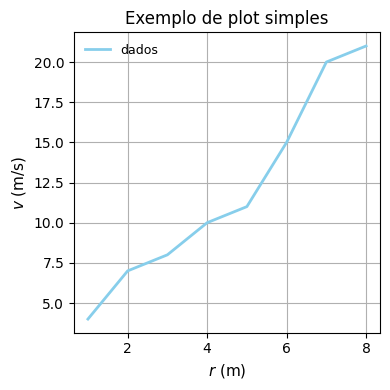

In [3]:
plt.figure(figsize=[4,4])
plt.plot(raio, vel, color='skyblue', ls='-', lw=2, label='dados')
plt.xlabel('$r$ (m)', fontsize=11)
plt.ylabel('$v$ (m/s)', fontsize=11)
plt.legend(frameon=False, fontsize=9, loc="upper left")
plt.title('Exemplo de plot simples')
plt.grid(True)
plt.tight_layout()
#plt.savefig('plot-simples.png')

> **Agora é sua vez!**
> 
> Troque o tamanho da fonte, a cor e a largura da linha, o estilo da linha (pontilhado, tracejado), o local da legenda... Deixe o plot sem a grade.

### Scatter

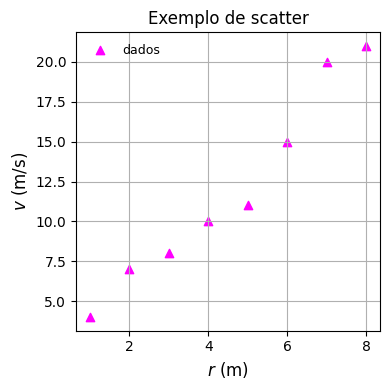

In [4]:
plt.figure(figsize=[4,4])
plt.scatter(raio, vel, c='magenta', marker='^', label='dados')
plt.xlabel('$r$ (m)', fontsize=12)
plt.ylabel('$v$ (m/s)', fontsize=12)
plt.legend(frameon=False, fontsize=9, loc="upper left")
plt.title('Exemplo de scatter')
plt.grid(True)
plt.tight_layout()
#plt.savefig('scatter.png')

> **Agora é sua vez!**
> 
> Troque o marker para 's', 'o', '.' e '*'. 

### Plot de pontos

In [5]:
x, sinx = np.loadtxt('exemplo3.txt', usecols=(0,1), unpack=True)

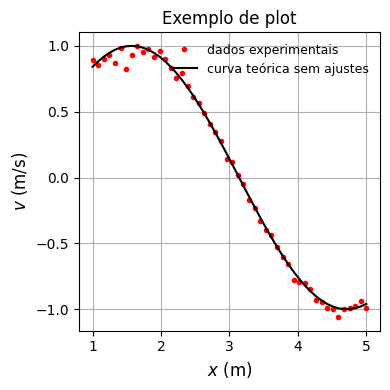

In [6]:
x_fit = np.sin(x)

plt.figure(figsize=[4,4])
plt.plot(x, sinx, 'r.', label='dados experimentais')
plt.plot(x, x_fit, 'k-', label='curva teórica sem ajustes')
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$v$ (m/s)', fontsize=12)
plt.legend(frameon=False, fontsize=9, loc="upper right")
plt.title('Exemplo de plot')
plt.grid()
plt.tight_layout()

### Plot duplo

In [7]:
r = np.logspace(0,4,50)
r

array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+01, 3.55648031e+01,
       4.29193426e+01, 5.17947468e+01, 6.25055193e+01, 7.54312006e+01,
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])

In [8]:
curva1 = r**2
curva2 = 2*r

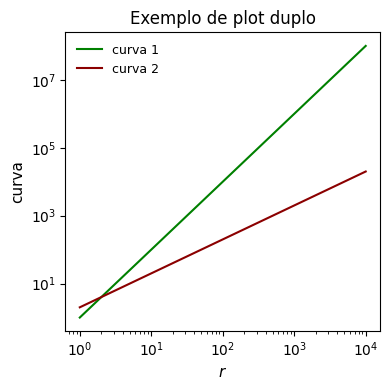

In [9]:
plt.figure(figsize=[4,4])
plt.plot(r, curva1, color='green', label='curva 1')
plt.plot(r, curva2, color='darkred', label='curva 2')
plt.xlabel('$r$', fontsize=11)
plt.ylabel('curva', fontsize=11)
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, fontsize=9, loc="upper left")
plt.title('Exemplo de plot duplo')
plt.grid(False)
plt.tight_layout()
#plt.savefig('plot-duplo.png')

> **Agora é sua vez!**
> 
> Crie uma terceira curva.

### Plot com annotate

In [10]:
x = np.arange(0, 10, 0.1)
y = np.sin(x) + (1/2)*x

In [11]:
max_y = np.max(y)
print(max_y)

5.0545989080882805


In [12]:
pos_max_y = np.where(y == max_y)
print(pos_max_y)
x_max_y = float(x[pos_max_y])
print(x_max_y)

(array([84]),)
8.4


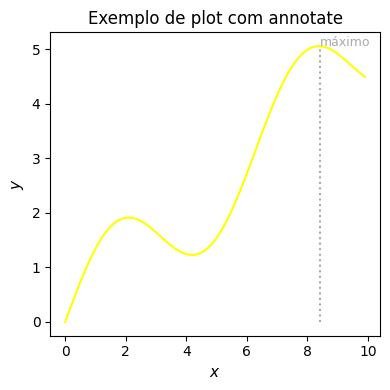

In [13]:
plt.figure(figsize=[4,4])
plt.plot(x, y, color='yellow')

plt.vlines(x_max_y, 0, 5, 'darkgrey', linestyles='dotted') #x, ymin, ymax
plt.annotate('máximo', xy=(x_max_y, max_y), fontsize=9, color='darkgrey')

plt.xlabel('$x$', fontsize=11)
plt.ylabel('$y$', fontsize=11)
plt.title('Exemplo de plot com annotate')
plt.grid(False)
plt.tight_layout()
#plt.savefig('plot-annotate.png')

> **Agora é sua vez!**
> 
> Experimente adicionar uma linha horizontal:
> 
> plt.hlines(max_y, 0, 10, 'darkgrey', linestyles='solid')

### Histogramas 1d e 2d

In [39]:
a, b, c = np.loadtxt('exemplo7.txt', usecols=(0,1,2), unpack=True)

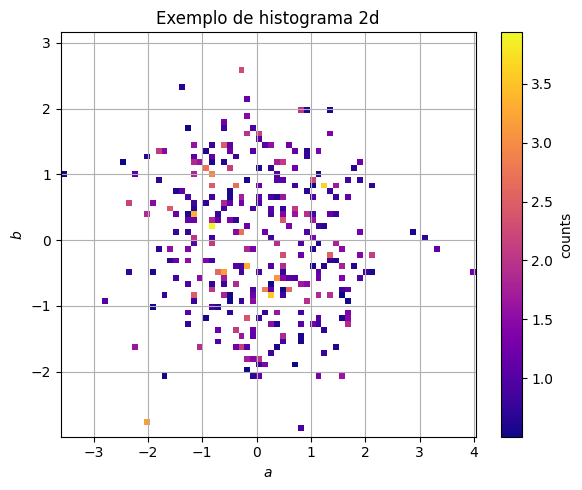

In [42]:
plt.figure(figsize=[6,5])
plt.hist2d(a, b, bins=70, weights=c, cmin=0.5, cmax=None, cmap='plasma')
cbar = plt.colorbar(label='counts')
plt.title('Exemplo de histograma 2d')
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.grid(True)
plt.tight_layout()

> **Agora é sua vez!**
> 
> Troque o colormap: experimente 'Blues', 'viridis', 'rainbow'.

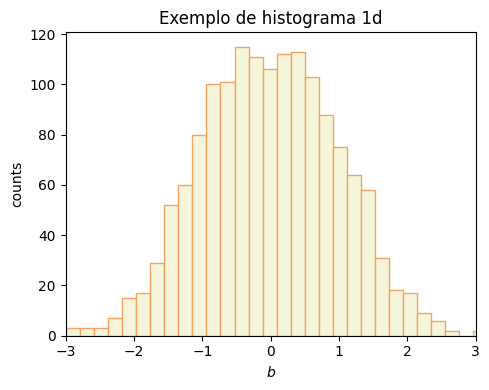

In [44]:
plt.figure(figsize=[5,4])
plt.hist(b, fc='beige', ec='sandybrown', bins=30)
plt.xlabel('$b$')
plt.ylabel('counts')
plt.xlim(-3, 3)
plt.title('Exemplo de histograma 1d')
plt.grid(False)
plt.tight_layout()

### Ajustes de curvas com scipy

Podemos ajustar qualquer curva a uma distribuição de pontos. Basta definir em uma função que curva é essa e depois usar a função curve_fit.

In [17]:
x, y = np.loadtxt('exemplo5.txt', usecols=(0,1), unpack=True)

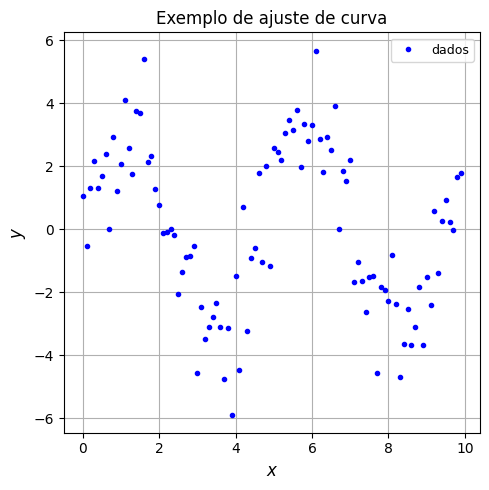

In [18]:
plt.figure(figsize=[5,5])
plt.plot(x, y, 'b.', label='dados')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(frameon=True, fontsize=9, loc="upper right")
plt.title('Exemplo de ajuste de curva')
plt.grid()
plt.tight_layout()

In [19]:
def curva(x, a, b):
    return a * np.sin(b*x)

Coeficientes:
[3.29379147 1.3320572 ]
Covariância dos coeficientes:
[[2.91627221e-02 1.43029938e-05]
 [1.43029938e-05 7.04893832e-05]]


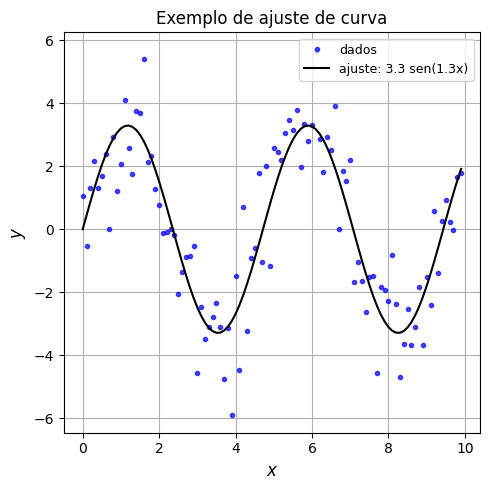

In [20]:
param, param_cov = curve_fit(curva, x, y)

print('Coeficientes:')
print(param)
print('Covariância dos coeficientes:')
print(param_cov)
  
a = param[0]
b = param[1]

ajuste = a* np.sin(b*x)

plt.figure(figsize=[5,5])
plt.plot(x, y, 'b.', alpha=0.7, label='dados')
plt.plot(x, ajuste, color ='black', label =f'ajuste: {round(a,1)} sen({round(b,1)}x)')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(frameon=True, fontsize=9, loc='upper right')
plt.title('Exemplo de ajuste de curva')
plt.grid()
plt.tight_layout()

Também podemos usar o linregress para regressões lineares.

In [21]:
z, w = np.loadtxt('exemplo6.txt', usecols=(0,1), unpack=True)

In [22]:
result = linregress(z, w)
print(result.slope, result.stderr, result.intercept, result.intercept_stderr)

2.0020371477947796 0.03492322491193593 8.73698203841584 0.2001164781868991


In [23]:
regressao = result.intercept + result.slope*z

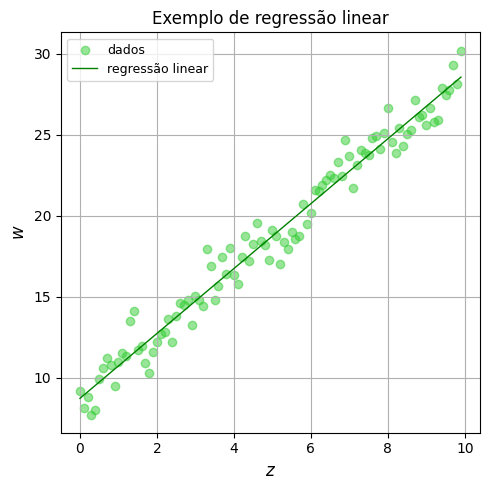

In [24]:
plt.figure(figsize=[5,5])
plt.scatter(z, w, c='limegreen', alpha= 0.5, label='dados')
plt.plot(z, regressao, color='green', ls='-', lw=1, label='regressão linear')
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$w$', fontsize=12)
plt.legend(frameon=True, fontsize=9, loc='upper left')
plt.title('Exemplo de regressão linear')
plt.grid()
plt.tight_layout()

E aí? O que mais você quer aprender?
Lembre-se que existem exemplos nos sites do matplotlib e scipy. Tem muitas outras coisas que podemos fazer quando se trata de visualização de dados!


Espero ter contribuído para seu aprendizado. Se quiser falar comigo, basta me mandar um email.